In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_5298/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
RESULTS_FILES = [
    ("search_results_sgd_square-large-training.csv.jsonl", "search_results_rmsprop_square-large-training.csv.jsonl"),
    ("search_results_sgd_multimodal-large-training.csv.jsonl", "search_results_rmsprop_multimodal-large-training.csv.jsonl"),
    ("search_results_sgd_steps-large-training.csv.jsonl", "search_results_rmsprop_steps-large-training.csv.jsonl")
]

In [8]:
analyse = 0

In [9]:
sgd_df, rmsprop_df = pd.read_json(RESULTS_FILES[analyse][0], lines=True), pd.read_json(RESULTS_FILES[analyse][1], lines=True)

In [10]:
sgd_df_rows = []
for count, row in sgd_df.iterrows():
    params = row["params"]
    current_row_dict = params
    current_row_dict["activation"] = current_row_dict["activation"][0]
    current_row_dict["train_losses"] = row["train_losses"]
    current_row_dict["mse"] = row["mse"][0]
    sgd_df_rows.append(current_row_dict)

sgd_df = pd.DataFrame(sgd_df_rows)
sgd_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.5,1,0.10,10,"[0.0490489985, 0.025520318, 0.0170727996, 0.01...",242.530639
1,relu,10,0.5,1,0.10,15,"[0.0428858473, 0.0288621674, 0.0188251169, 0.0...",200.755699
2,relu,10,0.5,1,0.10,30,"[0.0314874016, 0.022265685900000002, 0.0132251...",169.762201
3,relu,10,0.5,1,0.05,10,"[0.2104439127, 0.0488007956, 0.029487072500000...",328.446972
4,relu,10,0.5,1,0.05,15,"[0.0707360212, 0.041092859, 0.0326193912, 0.02...",380.157574


In [11]:
rmsprop_df_rows = []
for count, row in rmsprop_df.iterrows():
    params = row["params"]
    current_row_dict = params
    current_row_dict["activation"] = current_row_dict["activation"][0]
    current_row_dict["train_losses"] = row["train_losses"]
    current_row_dict["mse"] = row["mse"][0]
    rmsprop_df_rows.append(current_row_dict)

rmsprop_df = pd.DataFrame(rmsprop_df_rows)
rmsprop_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.7,1,0.10,10,"[0.0293993842, 0.054112710800000005, 0.0151927...",1364.076628
1,relu,10,0.7,1,0.10,15,"[0.053781517300000005, 0.0648142225, 0.0942115...",395.548629
2,relu,10,0.7,1,0.10,30,"[0.0203048026, 0.07031426860000001, 0.02523236...",1158.378693
3,relu,10,0.7,1,0.05,10,"[0.046711914300000004, 0.0644921349, 0.0611395...",166.742951
4,relu,10,0.7,1,0.05,15,"[0.1097555057, 0.018774518100000002, 0.0183343...",277.071611


In [12]:
sorted_sgd_df = sgd_df.sort_values("mse").reset_index(drop=True)
sorted_sgd_df.head(n=10)

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.5,3,0.05,15,"[0.0182533261, 0.009144754100000001, 0.0079285...",71.489503
1,relu,10,0.8,4,0.10,10,"[0.0349266513, 0.0150413785, 0.0159303644, 0.0...",82.348721
2,relu,10,0.8,3,0.10,30,"[0.0265487672, 0.0123701685, 0.006982437, 0.00...",83.117324
3,relu,10,0.5,4,0.10,15,"[0.015595330400000001, 0.0070610493, 0.0053420...",83.563821
4,relu,10,0.8,3,0.10,15,"[0.0193650098, 0.009194847400000001, 0.0055139...",88.172252
5,relu,20,0.5,4,0.05,10,"[0.19573235830000002, 0.0209941166, 0.01399137...",106.027483
6,relu,10,0.5,4,0.10,10,"[0.0535857592, 0.0117732555, 0.0246249599, 0.0...",114.660693
7,relu,20,0.5,2,0.10,10,"[0.0645480903, 0.0193289684, 0.0130141365, 0.0...",119.482764
8,relu,10,0.5,2,0.05,30,"[0.0201849591, 0.0073560873, 0.0048143847, 0.0...",133.176578
9,relu,30,0.5,4,0.10,10,"[0.1659293487, 0.0400469377, 0.0142071563, 0.0...",136.224134


In [22]:
sorted_sgd_df[sorted_sgd_df["layers"] == 1]

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
18,relu,10,0.5,1,0.1000,30,"[0.0314874016, 0.022265685900000002, 0.0132251...",169.762201
23,relu,20,0.5,1,0.1000,30,"[0.0365573898, 0.0252524164, 0.014021375800000...",182.458311
27,relu,10,0.5,1,0.1000,15,"[0.0428858473, 0.0288621674, 0.0188251169, 0.0...",200.755699
37,relu,10,0.5,1,0.1000,10,"[0.0490489985, 0.025520318, 0.0170727996, 0.01...",242.530639
42,relu,10,0.8,1,0.1000,30,"[0.0470213581, 0.0294124404, 0.0197277145, 0.0...",251.792606
...,...,...,...,...,...,...,...,...
1719,tanh,10,0.9,1,0.0001,10,"[7.2289716135, 7.1123735716, 6.9979232022, 6.8...",39537.621063
1720,relu,20,0.9,1,0.0001,30,"[2.9026599704000002, 2.8753615065, 2.848531058...",40299.377528
1721,tanh,50,0.8,1,0.0001,30,"[8.6829321171, 8.4913371315, 8.3045344995, 8.1...",41959.742293
1723,tanh,30,0.8,1,0.0001,15,"[4.8663539447, 4.7843387572000005, 4.703845435...",48139.996422


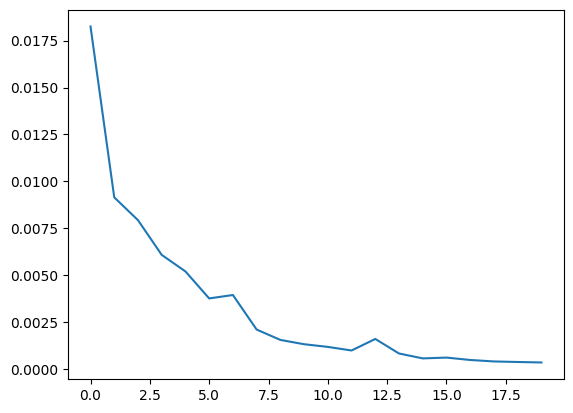

In [14]:
plt.plot(sorted_sgd_df.loc[0, "train_losses"])

In [15]:
sorted_rmsprop_df = rmsprop_df.sort_values("mse").reset_index(drop=True)
sorted_rmsprop_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.8,1,0.010,30,"[0.0104004309, 0.0300800559, 0.024247531500000...",39.123078
1,relu,10,0.8,1,0.005,15,"[0.0482627733, 0.016895178900000002, 0.0063647...",40.679798
2,relu,20,0.9,1,0.050,30,"[0.3503025272, 0.1740922963, 0.1368825564, 0.0...",42.462717
3,relu,10,0.7,1,0.005,10,"[0.2469733257, 0.054089387200000005, 0.0349231...",42.653541
4,relu,10,0.7,3,0.010,15,"[0.0393934254, 0.0237978231, 0.013212063000000...",44.695637


In [24]:
sorted_rmsprop_df[sorted_rmsprop_df["layers"] == 2]

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
5,relu,10,0.9,2,0.0100,30,"[0.0090915344, 0.0097096619, 0.0051067353, 0.0...",52.840068
8,relu,20,0.9,2,0.0050,10,"[0.1387839311, 0.0257452814, 0.0128048976, 0.0...",56.993750
32,relu,10,0.9,2,0.0010,10,"[0.45642967770000004, 0.2795536751, 0.12811663...",89.730928
46,relu,10,0.9,2,0.0010,15,"[0.2685012312, 0.054706887600000004, 0.0175410...",105.508862
50,relu,10,0.7,2,0.0100,10,"[0.020796440200000002, 0.06747763920000001, 0....",106.992673
...,...,...,...,...,...,...,...,...
1703,tanh,30,0.9,2,0.1000,30,"[2.9447235728, 0.6044381037000001, 0.998827977...",18032.354709
1704,tanh,50,0.7,2,0.0001,10,"[5.3754168022, 5.187303143, 5.00286179, 4.8231...",18067.549202
1714,tanh,50,0.8,2,0.1000,30,"[1.8496446682, 0.20198330050000002, 2.99515604...",26417.961519
1715,tanh,30,0.7,2,0.1000,30,"[1.8539203878000001, 2.3368778764, 1.674672726...",26517.483306


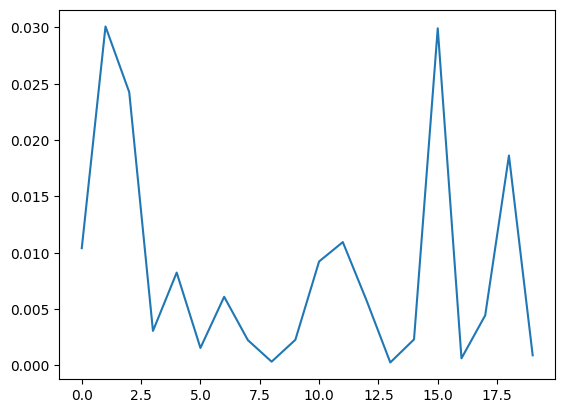

In [17]:
plt.plot(sorted_rmsprop_df.loc[0, "train_losses"])

In [18]:
concat_sgd_df = sgd_df[["learning_rate", "mse", "train_losses"]]
concat_sgd_df["optim"] = "sgd"

concat_rmsprop_df = rmsprop_df[["learning_rate", "mse", "train_losses"]]
concat_rmsprop_df["optim"] = "rmsprop"


results_df = pd.concat([
    concat_sgd_df,
    concat_rmsprop_df
])

/tmp/ipykernel_5298/2284528901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_sgd_df["optim"] = "sgd"
/tmp/ipykernel_5298/2284528901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_rmsprop_df["optim"] = "rmsprop"


In [19]:
res2_df = results_df.groupby(["optim", "learning_rate"]).agg({"mse": "min"}).reset_index().set_index(["optim", "learning_rate", "mse"]).join(
    results_df.set_index(["optim", "learning_rate", "mse"])
).reset_index()
res2_df

,optim,learning_rate,mse,train_losses
0,rmsprop,0.0001,298.866658,"[0.8085472101000001, 0.6545533554, 0.523726396..."
1,rmsprop,0.0010,78.846383,"[0.5743264861, 0.327771343, 0.1287757093, 0.03..."
2,rmsprop,0.0050,40.679798,"[0.0482627733, 0.016895178900000002, 0.0063647..."
3,rmsprop,0.0100,39.123078,"[0.0104004309, 0.0300800559, 0.024247531500000..."
4,rmsprop,0.0500,42.462717,"[0.3503025272, 0.1740922963, 0.1368825564, 0.0..."
5,rmsprop,0.1000,179.452011,"[0.07288622260000001, 0.1880785592, 0.01489079..."
6,sgd,0.0001,5708.425893,"[1.589948052, 1.4920441851000001, 1.4050545506..."
7,sgd,0.0010,855.990499,"[0.5370717409, 0.38889705950000003, 0.28830044..."
8,sgd,0.0050,470.259542,"[0.5098722822, 0.1913436976, 0.0678153948, 0.0..."
9,sgd,0.0100,280.339041,"[0.2346730343, 0.0444403266, 0.0234971, 0.0146..."


In [20]:
res2_df.train_losses.apply(len).unique()

array([20])

/tmp/ipykernel_5298/2413393094.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.plot(sgd_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"SGD MSE={float(sgd_lr_data['mse'])}")
/tmp/ipykernel_5298/2413393094.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.plot(rmsprop_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"RMSprop MSE={float(rmsprop_lr_data['mse'])}")


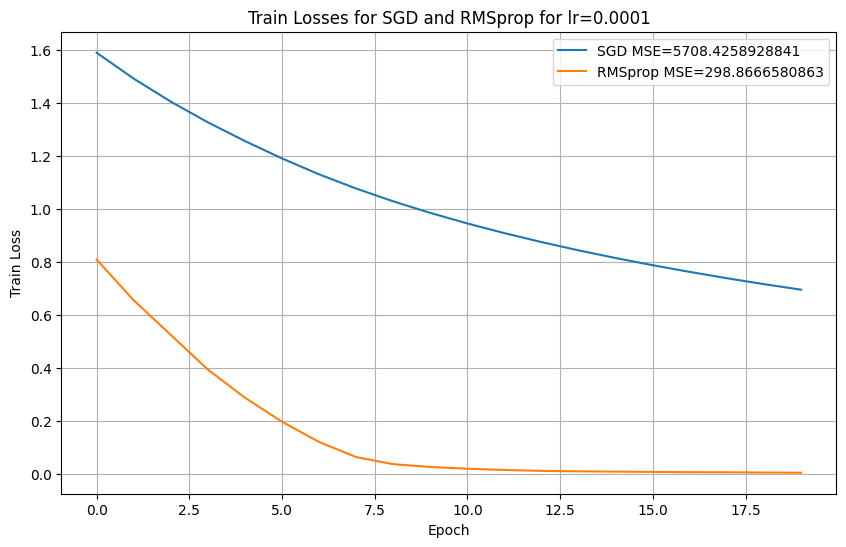

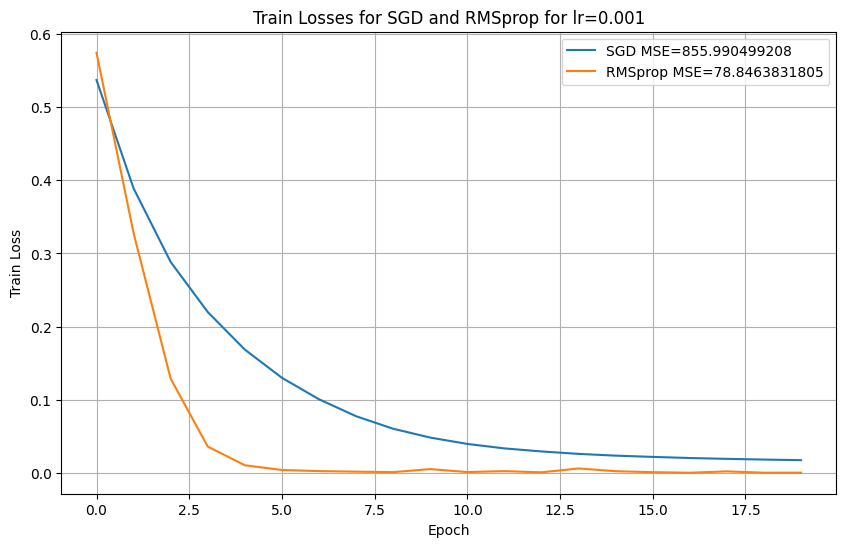

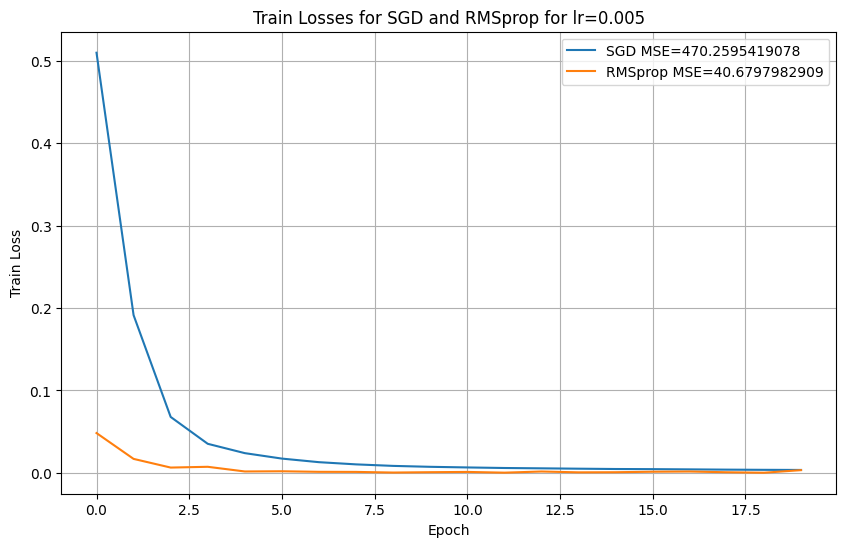

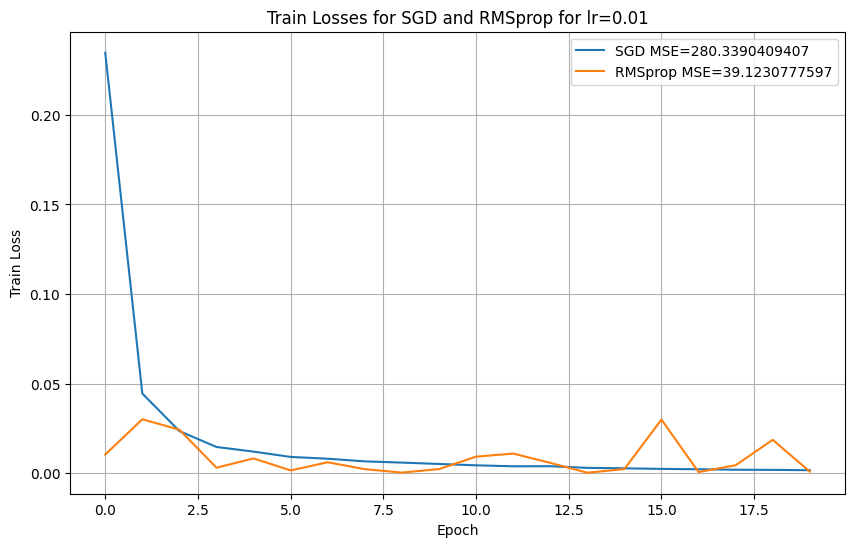

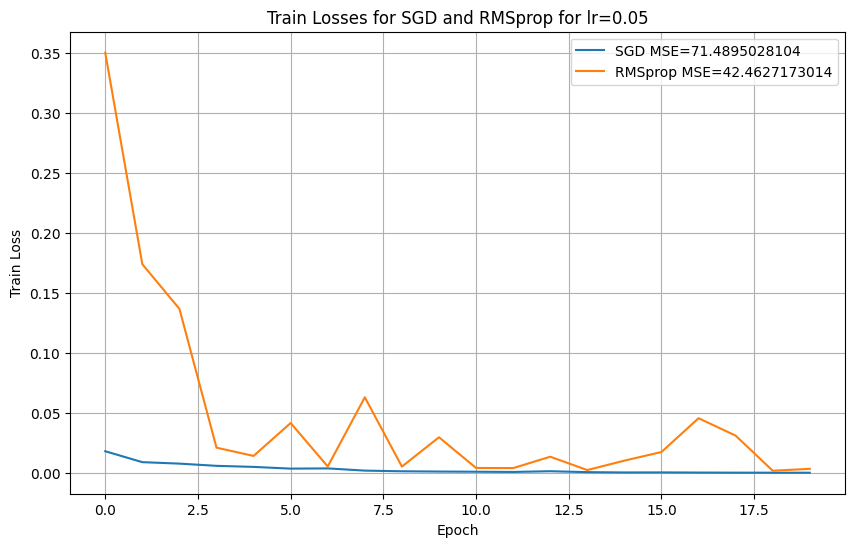

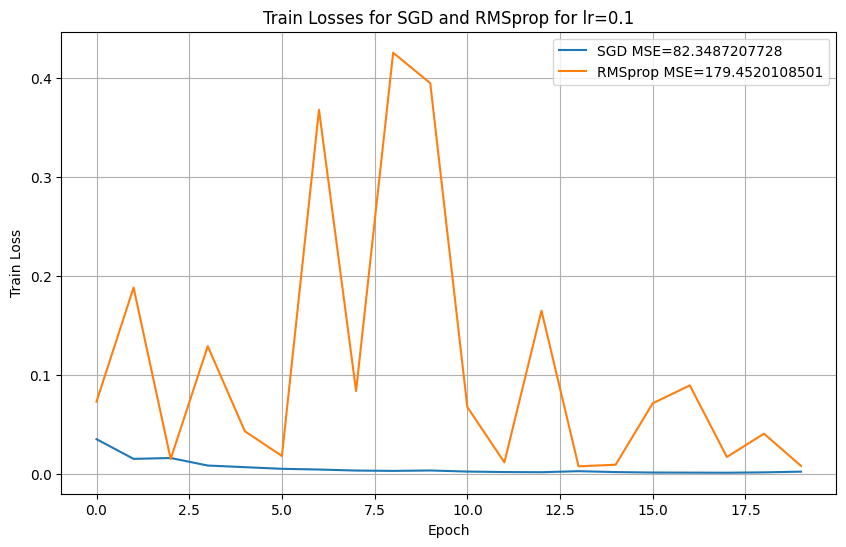

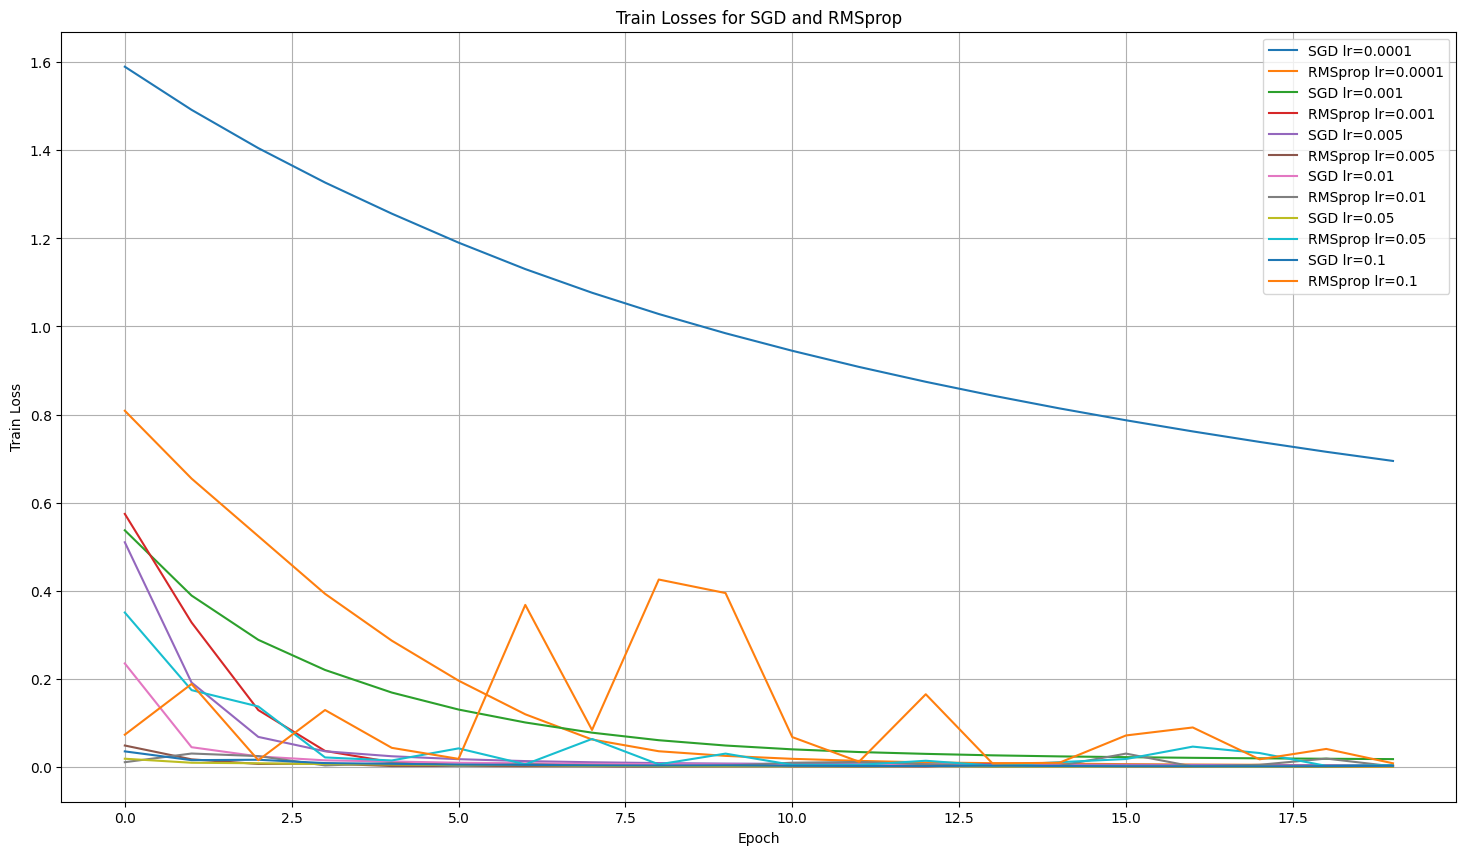

In [21]:
sgd_data = res2_df[res2_df['optim'] == 'sgd']
rmsprop_data = res2_df[res2_df['optim'] == 'rmsprop']

# Plotting
for lr in res2_df['learning_rate'].unique():
    sgd_lr_data = sgd_data[sgd_data['learning_rate'] == lr]
    rmsprop_lr_data = rmsprop_data[rmsprop_data['learning_rate'] == lr]

    plt.figure(figsize=(10, 6))
    plt.plot(sgd_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"SGD MSE={float(sgd_lr_data['mse'])}")
    plt.plot(rmsprop_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"RMSprop MSE={float(rmsprop_lr_data['mse'])}")
    plt.title(f'Train Losses for SGD and RMSprop for lr={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Train Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(18, 10))
for lr in res2_df['learning_rate'].unique():
    sgd_lr_data = sgd_data[sgd_data['learning_rate'] == lr]
    rmsprop_lr_data = rmsprop_data[rmsprop_data['learning_rate'] == lr]

    plt.plot(sgd_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"SGD lr={lr}")
    plt.plot(rmsprop_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"RMSprop lr={lr}")

plt.title('Train Losses for SGD and RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.grid(True)
plt.show()